In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import scipy.spatial.distance as distance

class RadialBasisFunctionNeuralNetwork:
    def __init__(self, num_of_rbf_units=10):
        self.num_of_rbf_units = num_of_rbf_units

    def _rbf_unit(self, rbf_center, point_in_dataset):
        return np.exp(-self.beta * distance.cdist([point_in_dataset], [rbf_center], 'euclidean')**2).flatten()[0]

    def _construct_interpolation_matrix(self, input_dataset):
        interpolation_matrix = np.zeros((len(input_dataset), self.num_of_rbf_units))
        for idx, point_in_dataset in enumerate(input_dataset):
            for center_idx, rbf_center in enumerate(self.rbf_centers):
                interpolation_matrix[idx, center_idx] = self._rbf_unit(rbf_center, point_in_dataset)
        return interpolation_matrix

    def train_model(self, input_dataset, target_dataset):
        self.kmeans_clustering = KMeans(n_clusters=self.num_of_rbf_units, random_state=0).fit(input_dataset)
        self.rbf_centers = self.kmeans_clustering.cluster_centers_
        self.beta = 1.0 / (2.0 * (self.kmeans_clustering.inertia_ / input_dataset.shape[0]))
        interpolation_matrix = self._construct_interpolation_matrix(input_dataset)
        self.model_weights = np.linalg.pinv(interpolation_matrix.T.dot(interpolation_matrix)).dot(interpolation_matrix.T).dot(target_dataset)

    def predict(self, input_dataset):
        interpolation_matrix = self._construct_interpolation_matrix(input_dataset)
        predicted_values = interpolation_matrix.dot(self.model_weights)
        return predicted_values

In [2]:
# Generating a simple classification dataset
input_dataset, target_dataset = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2)

In [3]:
print("input_dataset.shape:", input_dataset.shape)
print("target_dataset.shape:", target_dataset.shape)

input_dataset.shape: (500, 2)
target_dataset.shape: (500,)


## Gerando o dataset

In [4]:
def generate_data(y_func, x_n=21, x_low=-2, x_high=4):
  x = np.linspace(x_low, x_high, x_n).reshape((x_n, 1))
  y = np.array([y_func(fx) for fx in x.flatten()])
  return x, y

In [5]:
def proposed_function(x):
  return np.sin(x) + 4*np.cos(x) - 1

In [6]:
input_dataset, target_dataset = generate_data(proposed_function)

In [7]:
print("input_dataset.shape:", input_dataset.shape)
print("target_dataset.shape:", target_dataset.shape)

input_dataset.shape: (21, 1)
target_dataset.shape: (21,)


## RBF

In [8]:
# Initializing and training the RBF neural network
rbf_neural_network = RadialBasisFunctionNeuralNetwork(num_of_rbf_units=4)
rbf_neural_network.train_model(input_dataset, target_dataset)

# Predicting the target values
predictions = rbf_neural_network.predict(input_dataset)

# Converting continuous output to binary labels
binary_predictions = np.where(predictions > 0.5, 1, 0)
binary_target_dataset = np.where(target_dataset > 0.5, 1, 0)

print(f"Accuracy: {accuracy_score(binary_target_dataset, binary_predictions)}")

Accuracy: 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Plotting

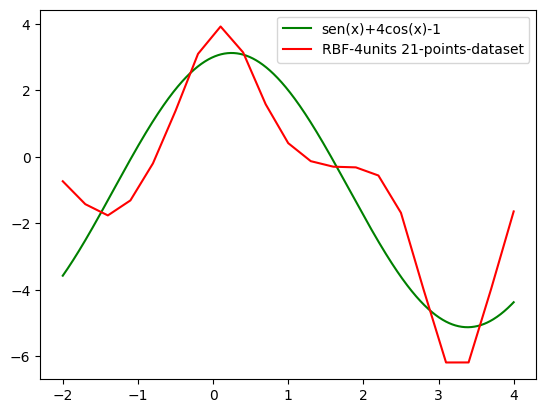

In [9]:
fx, fy = generate_data(proposed_function, 1000)

fig, ax = plt.subplots()

ax.plot(fx, fy, color="green")
ax.plot(input_dataset, predictions, color="red")

plt.legend(["sen(x)+4cos(x)-1", "RBF-4units 21-points-dataset"])

# extra

Gerando um GIF de plots com diversos tamanhos de dataset e quantidade de centros do RBF.

In [10]:
!pip install imageio

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-0ca5a26fdbd8>:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(image_dir, f"temp_{idx}.png"))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-0ca5a26fdbd8>:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (a

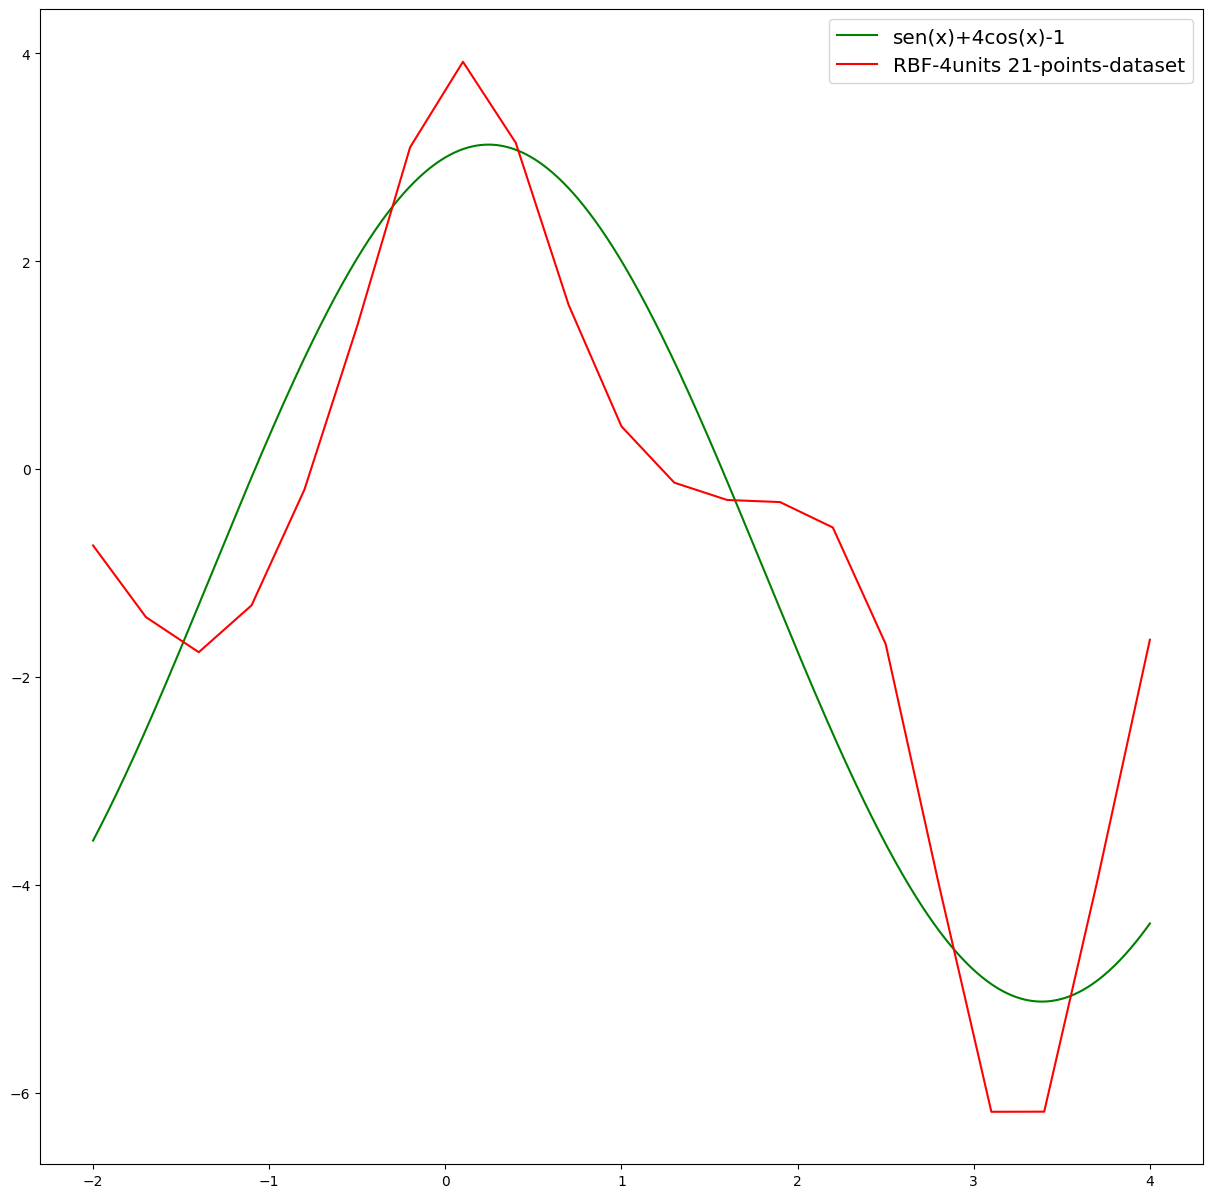

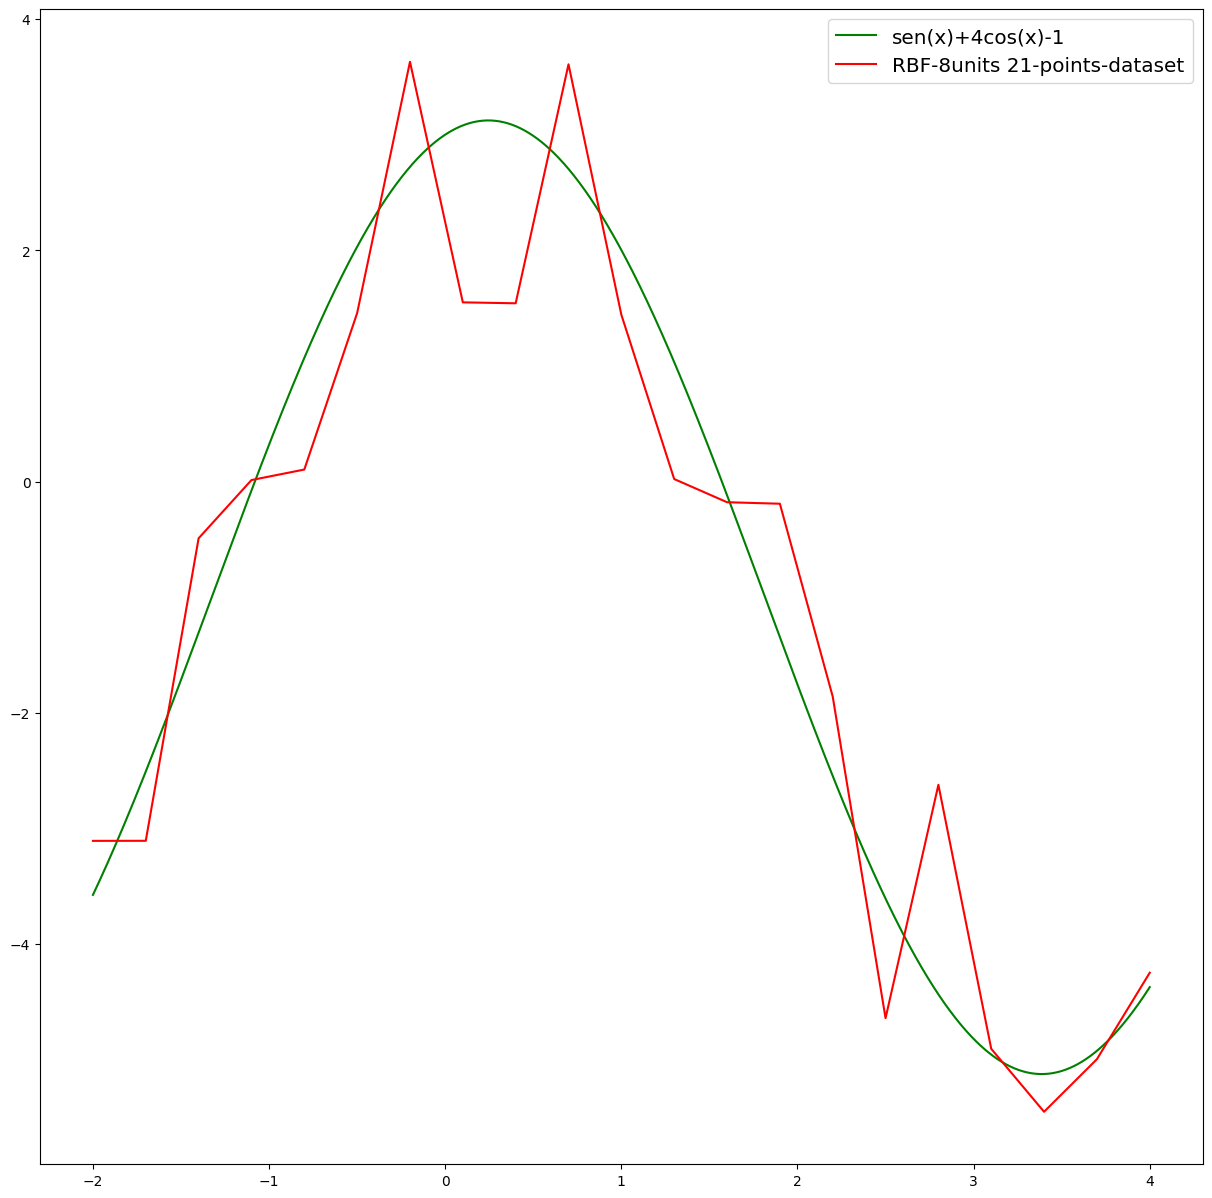

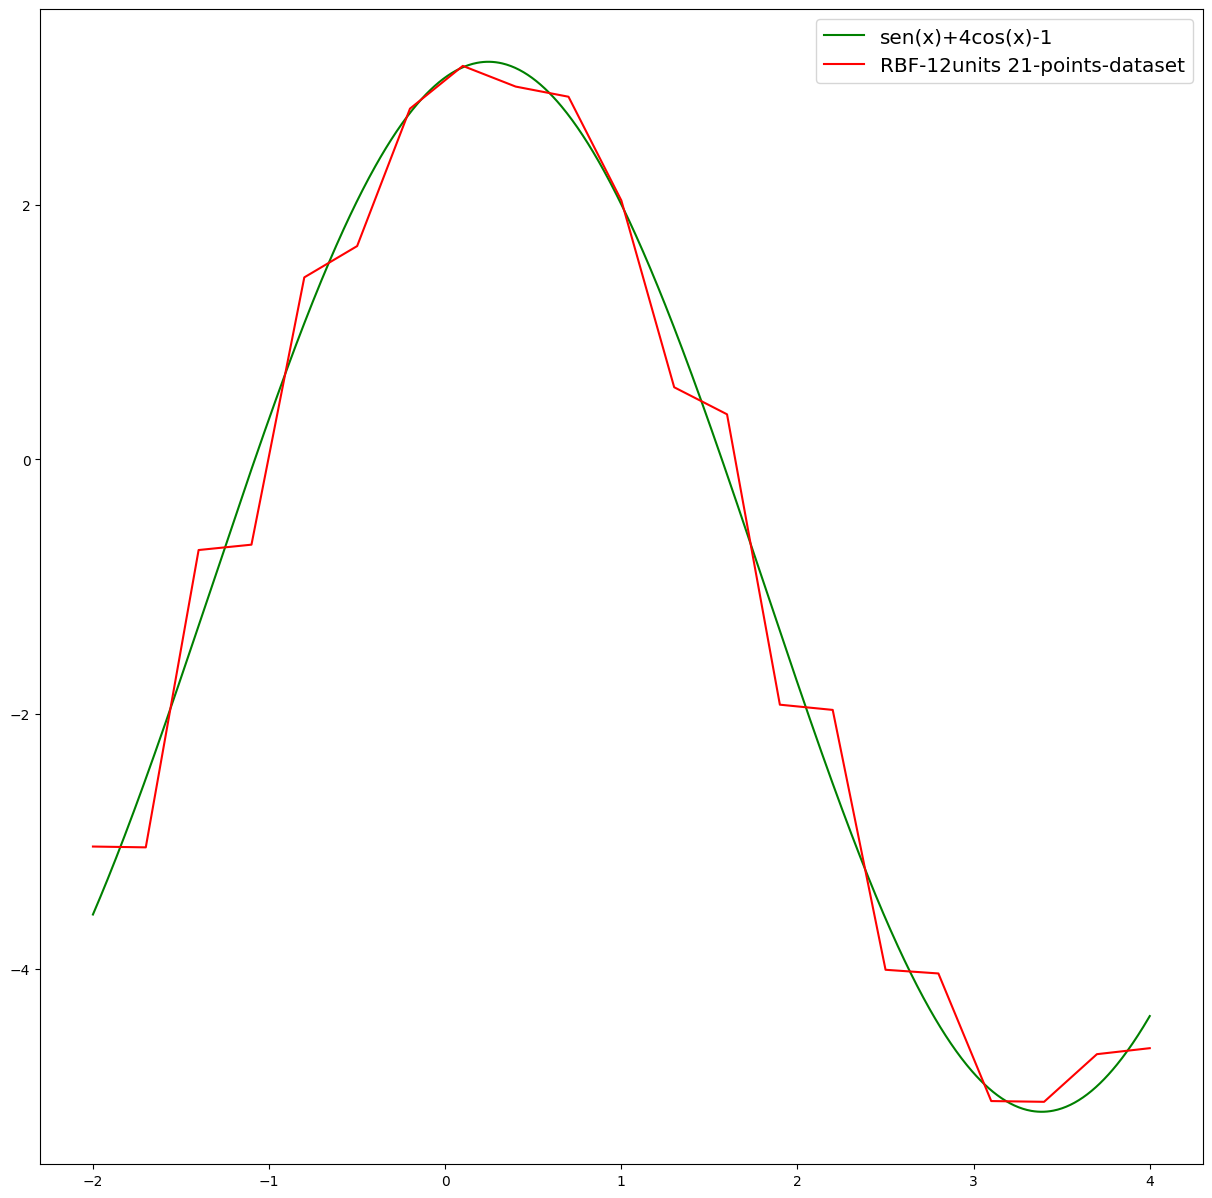

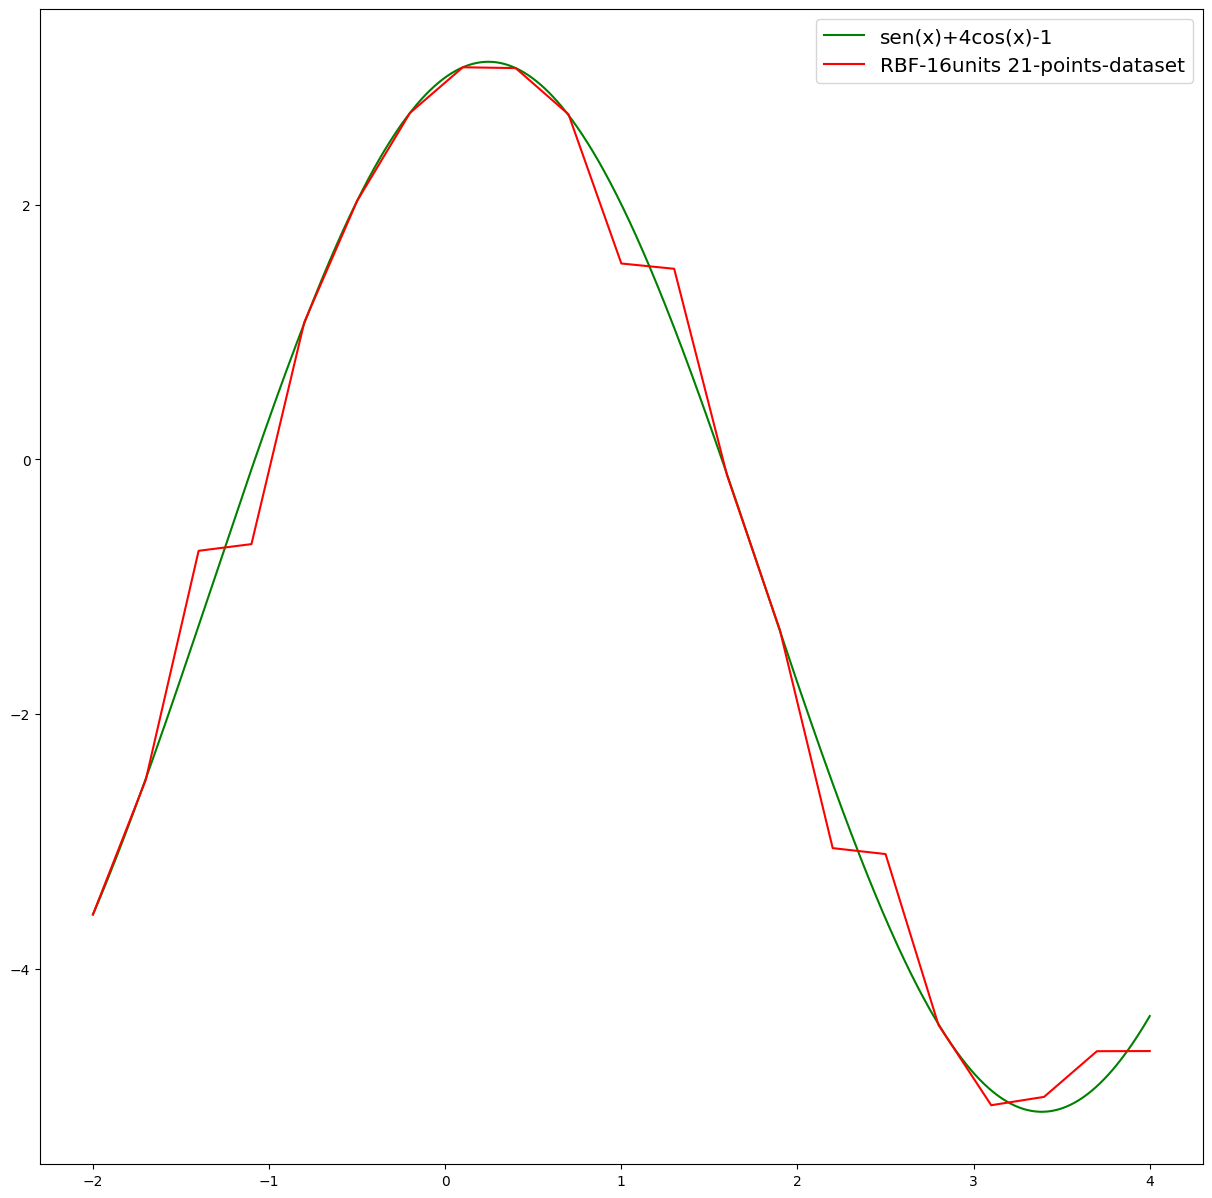

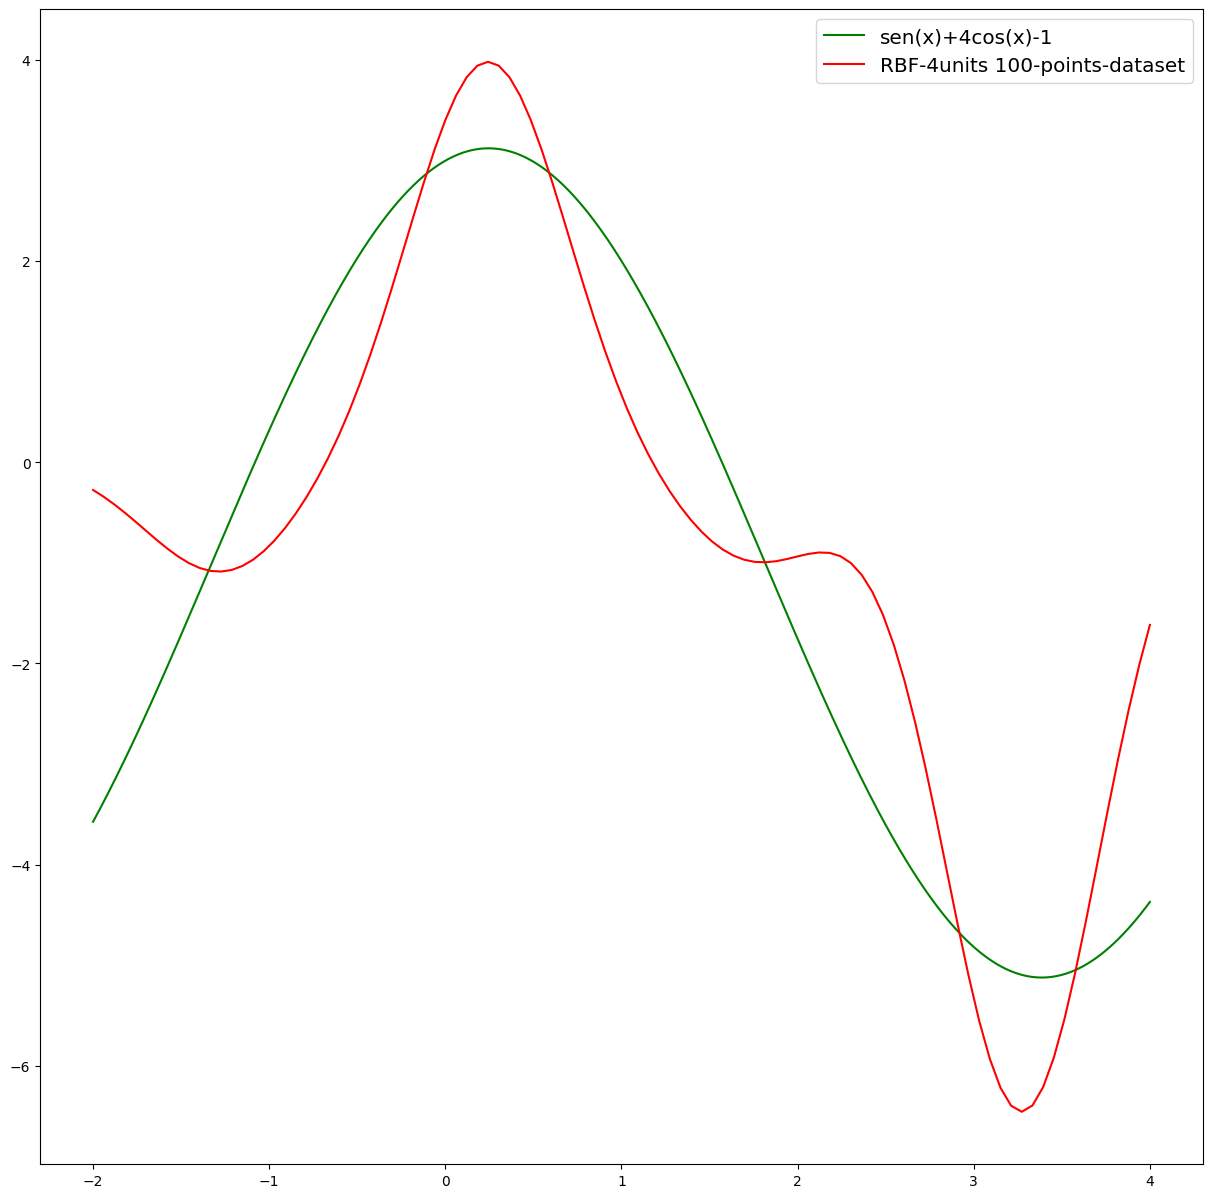

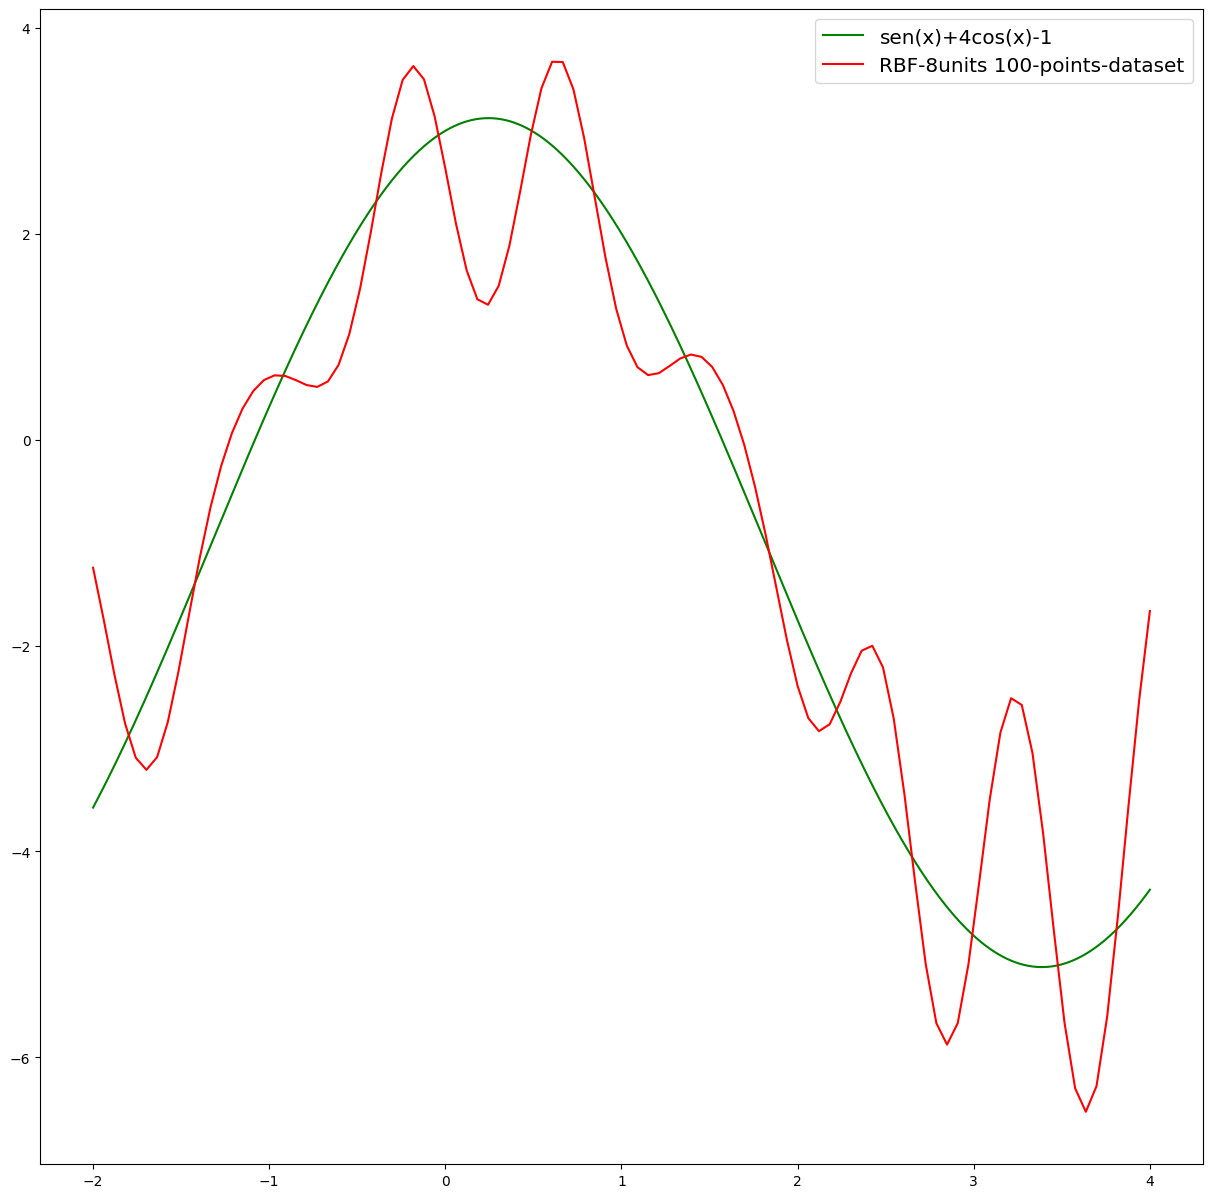

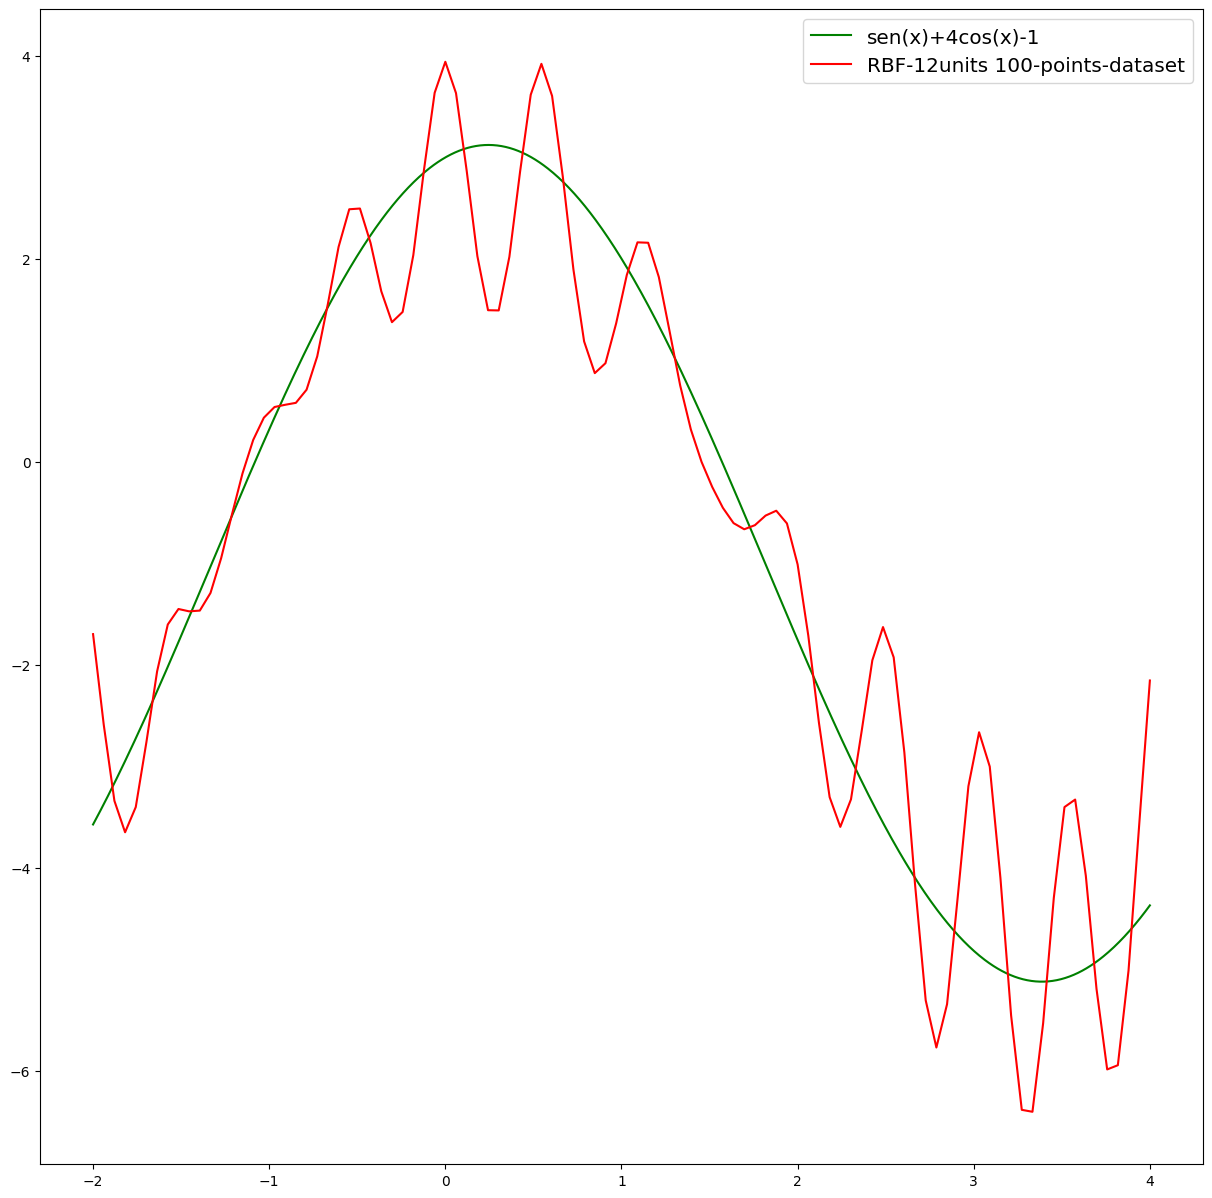

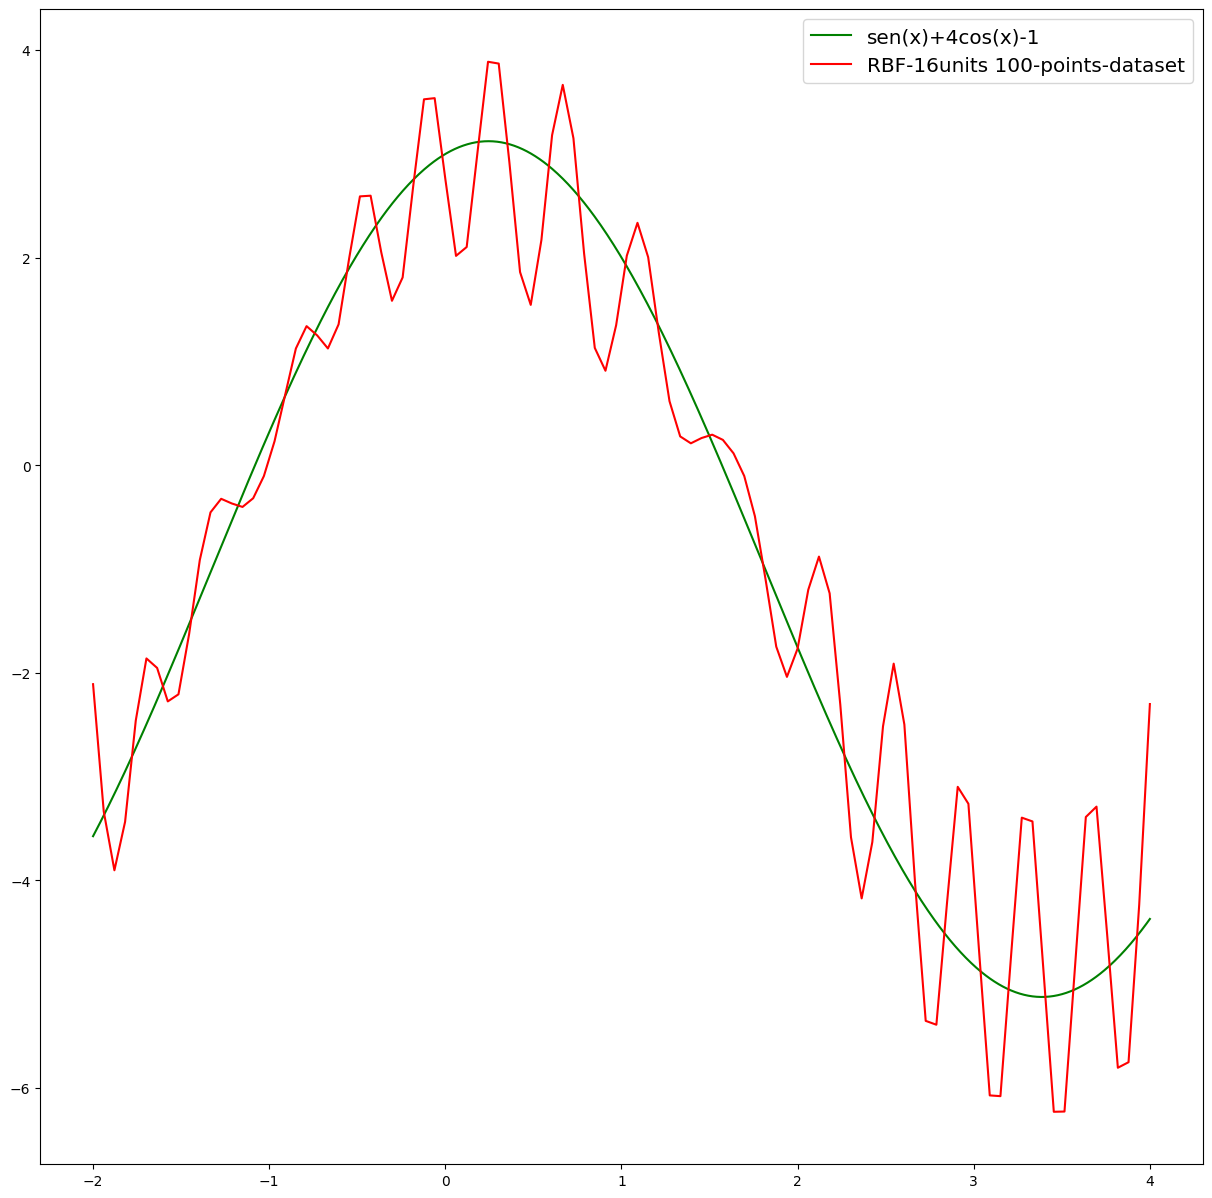

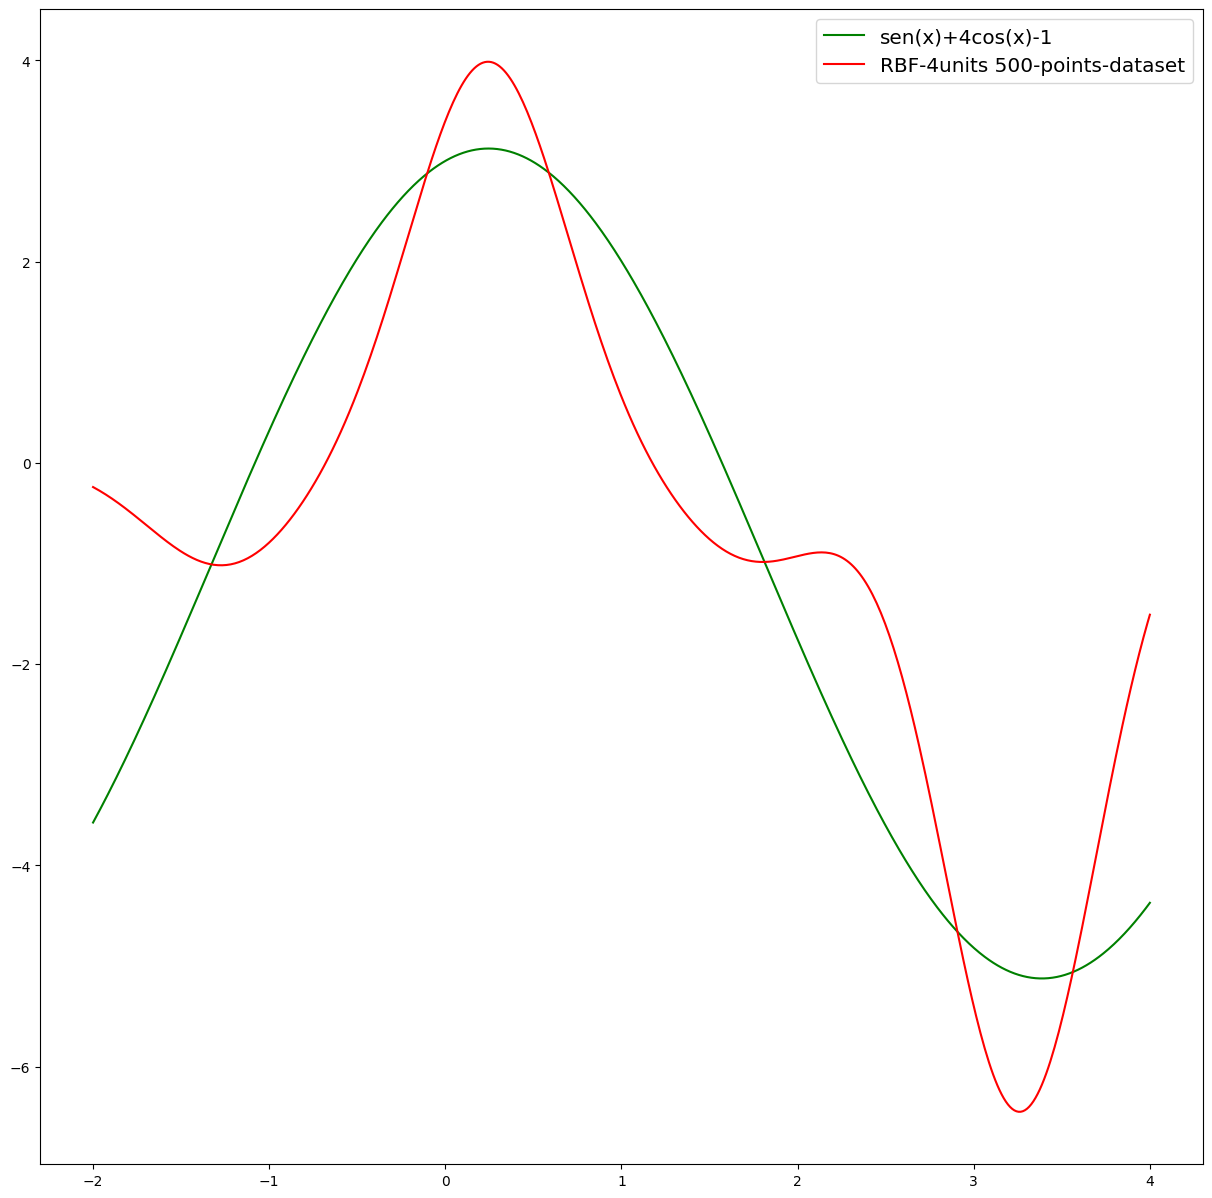

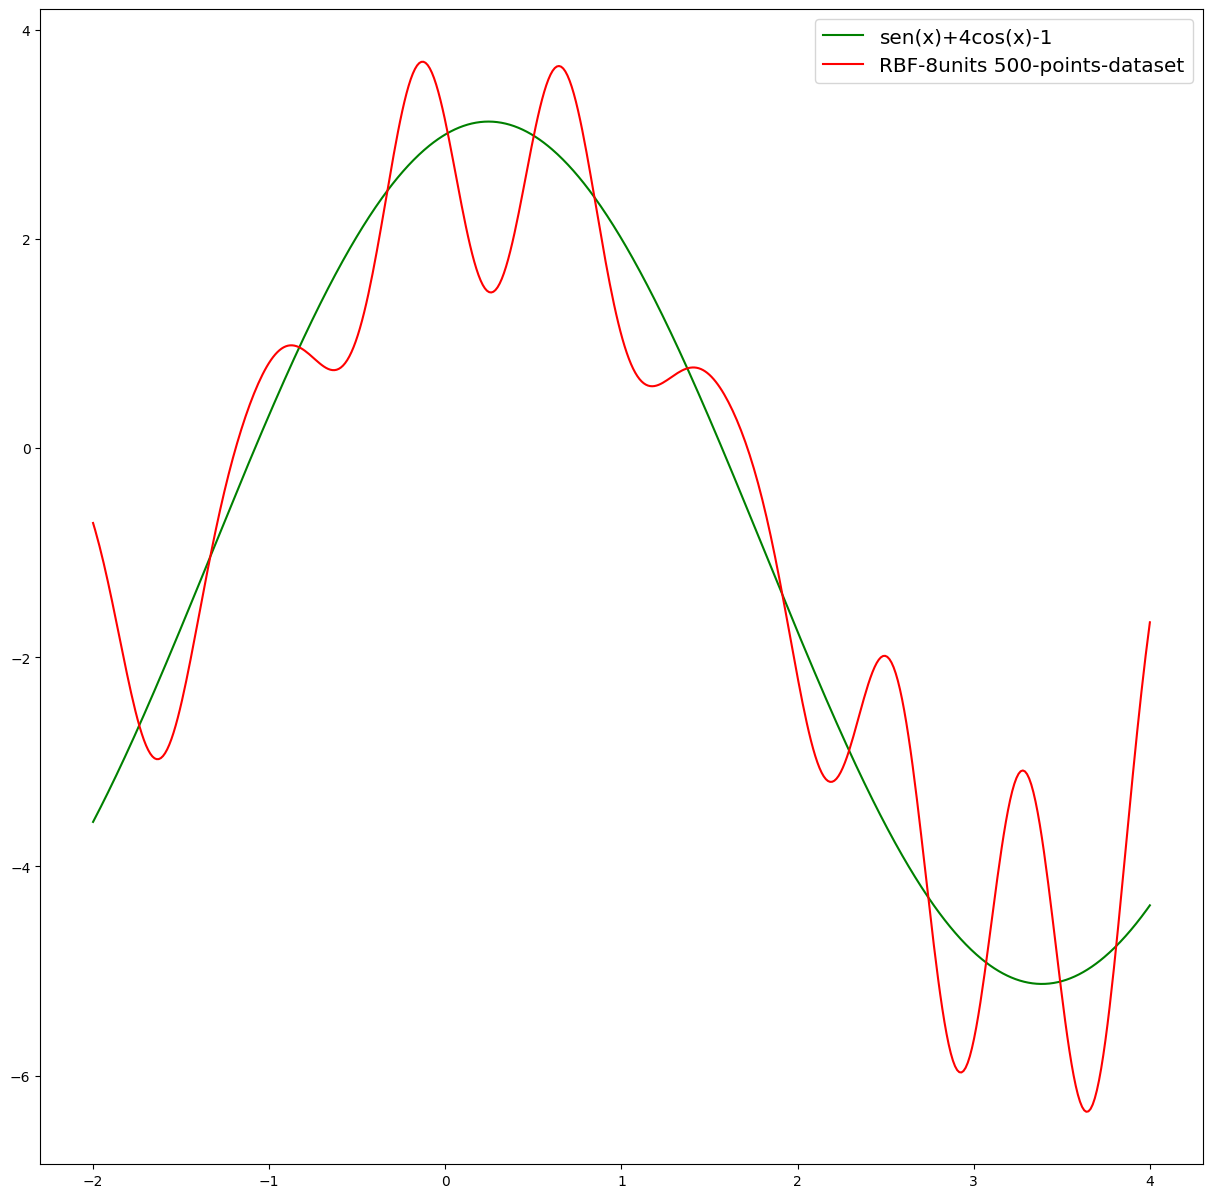

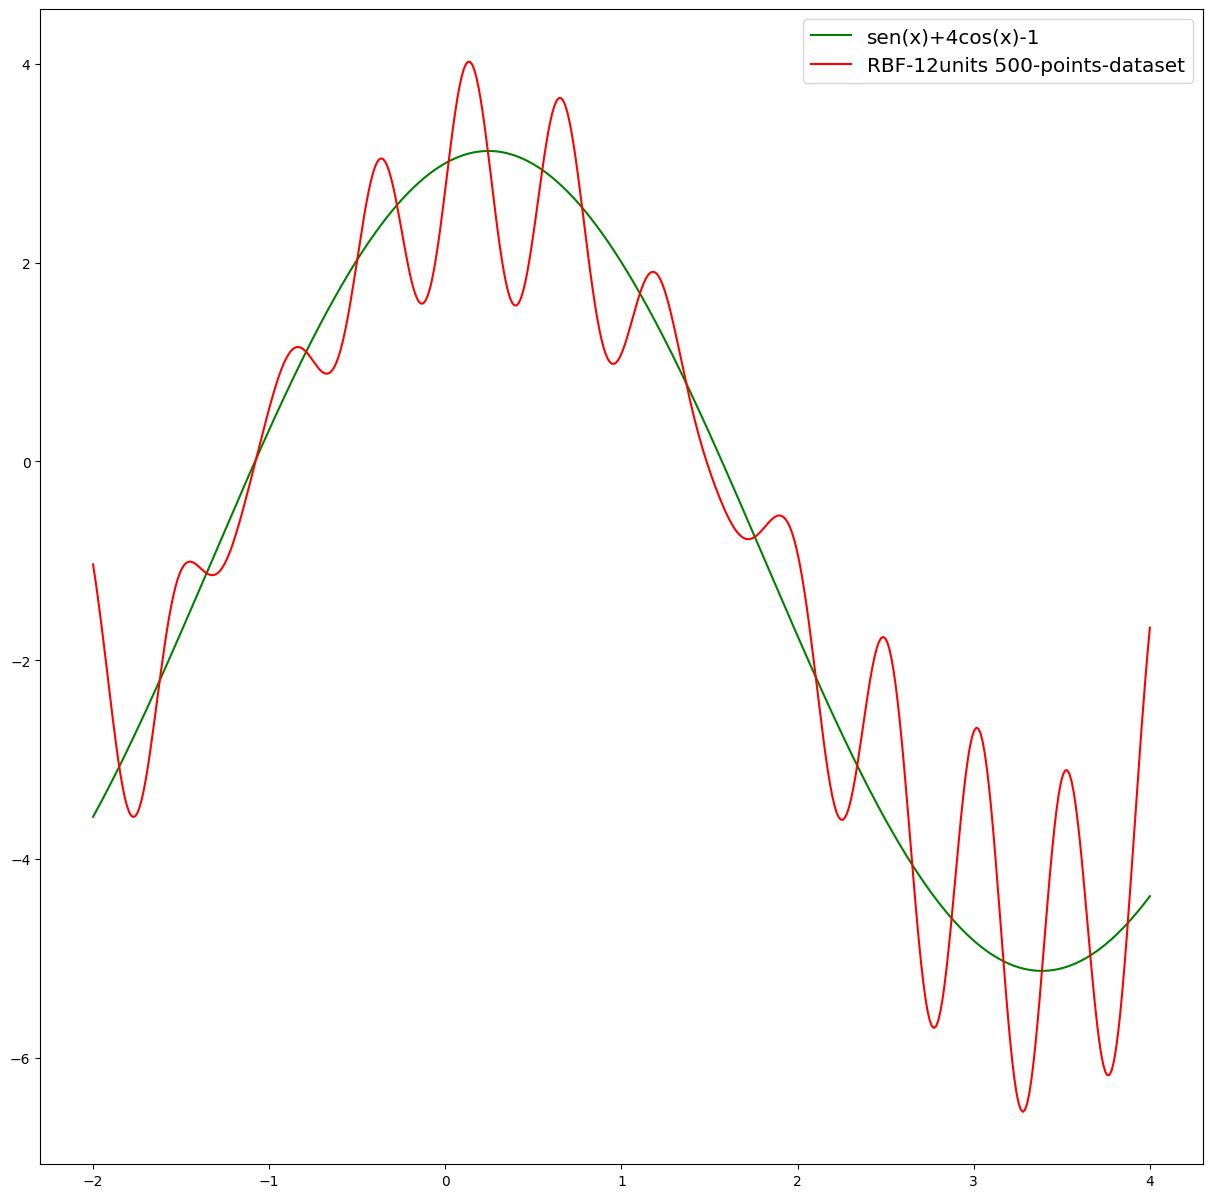

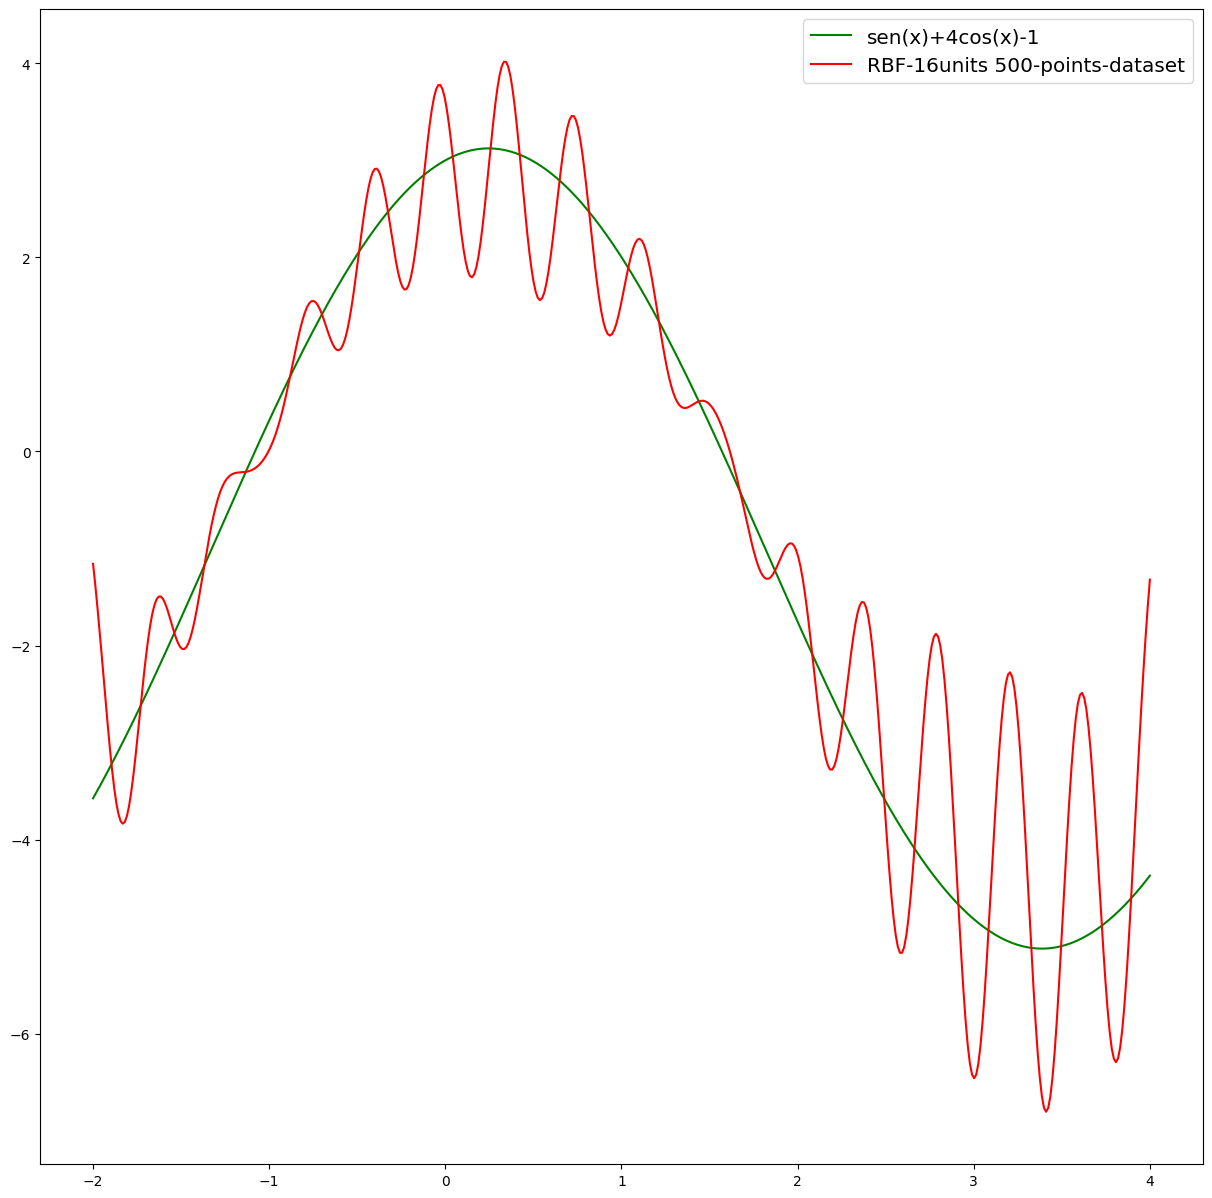

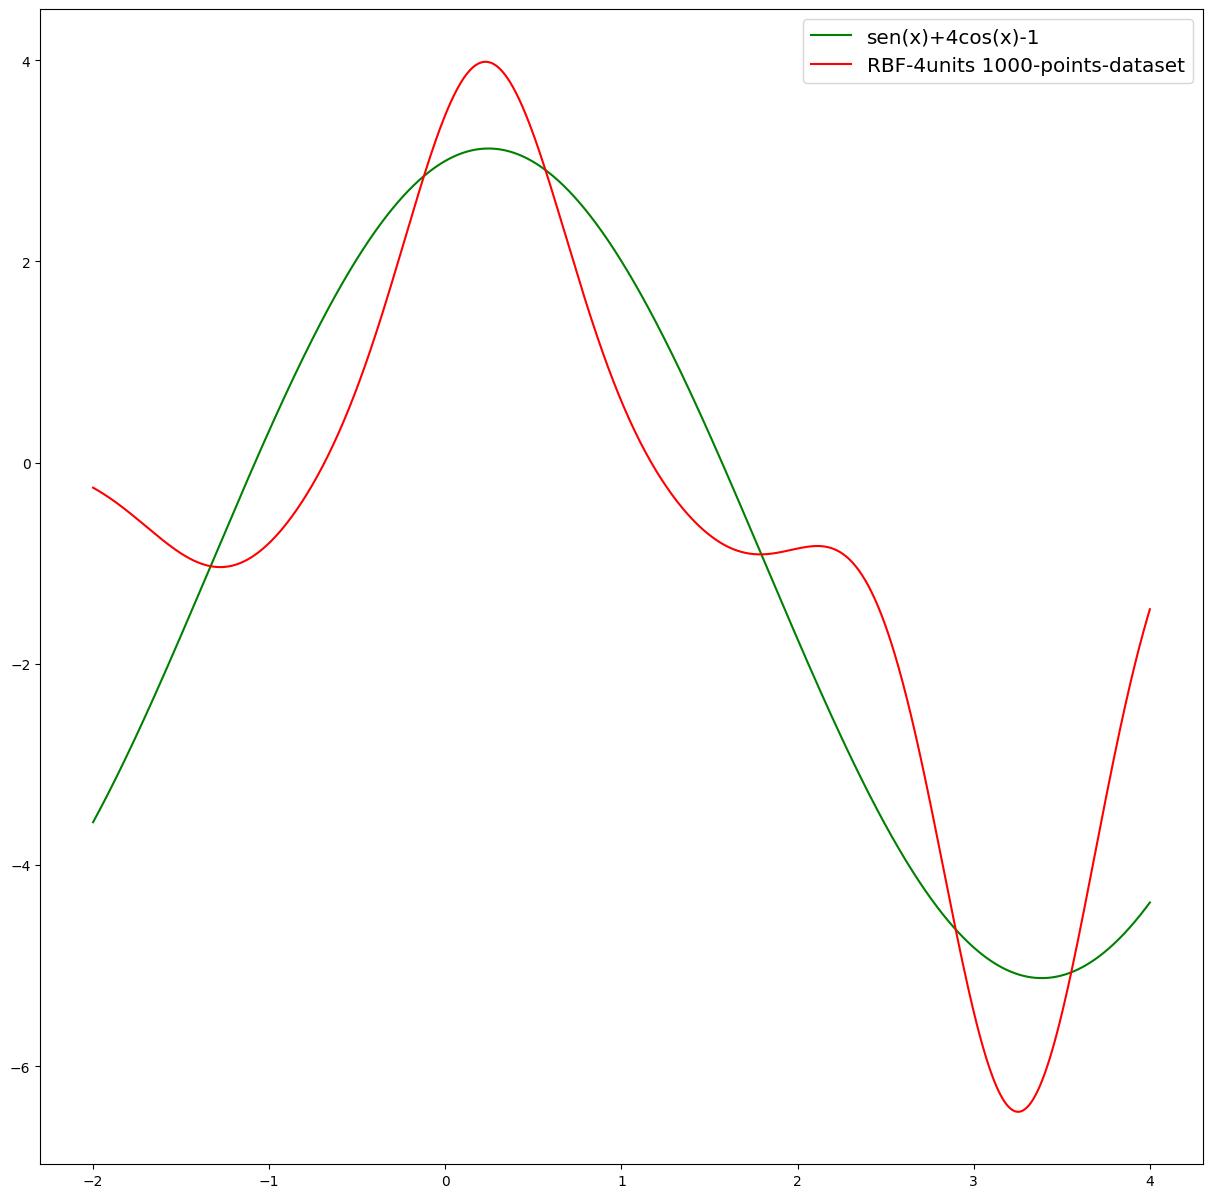

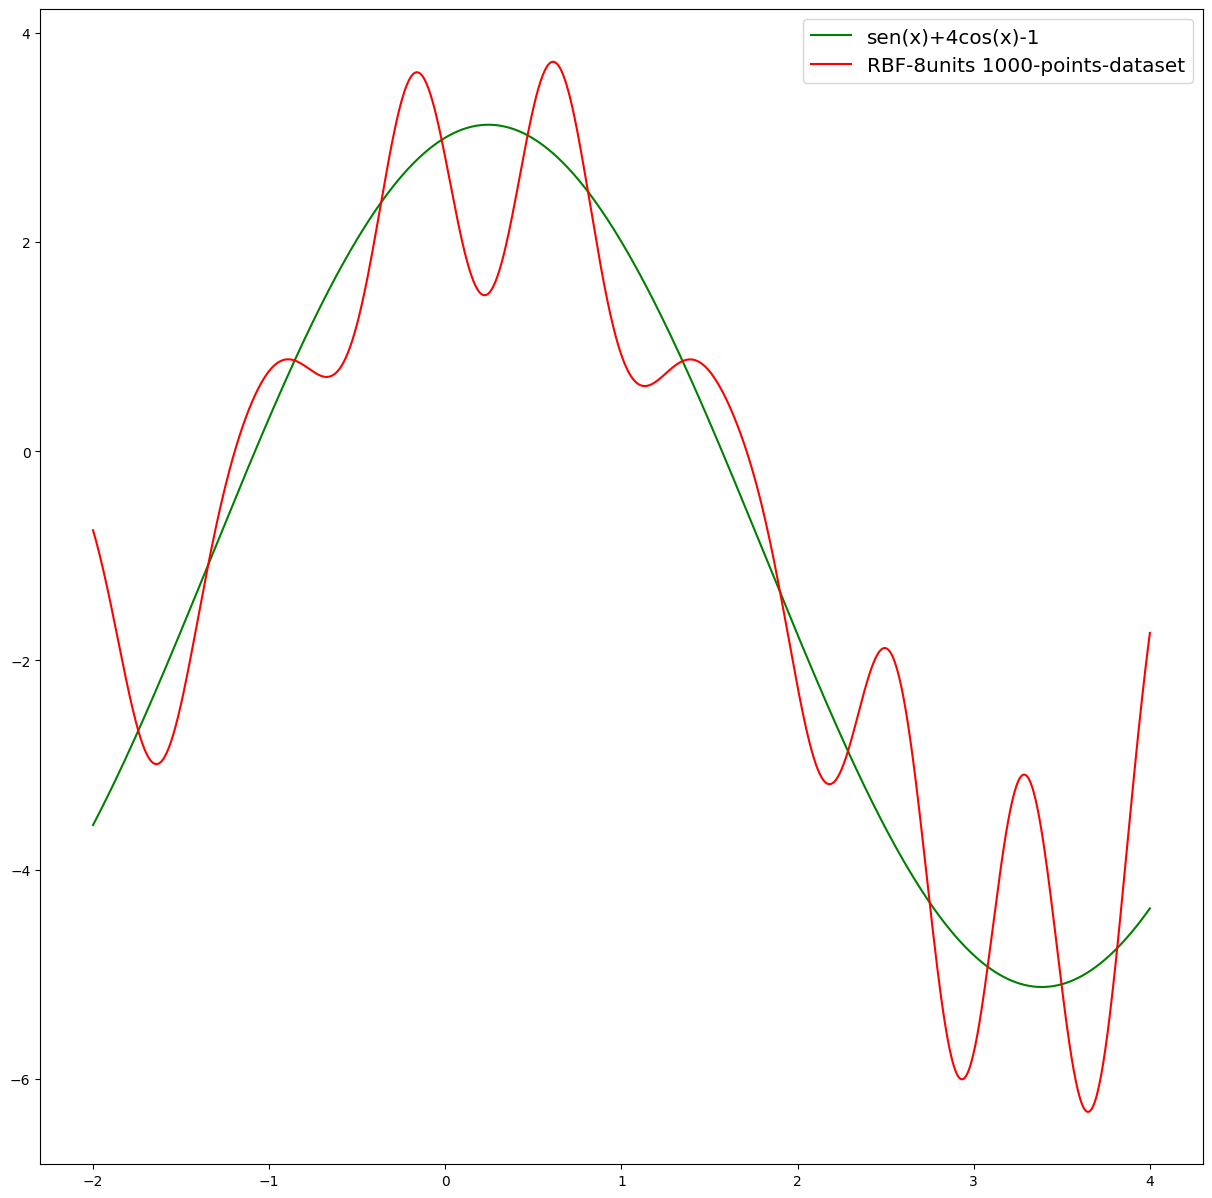

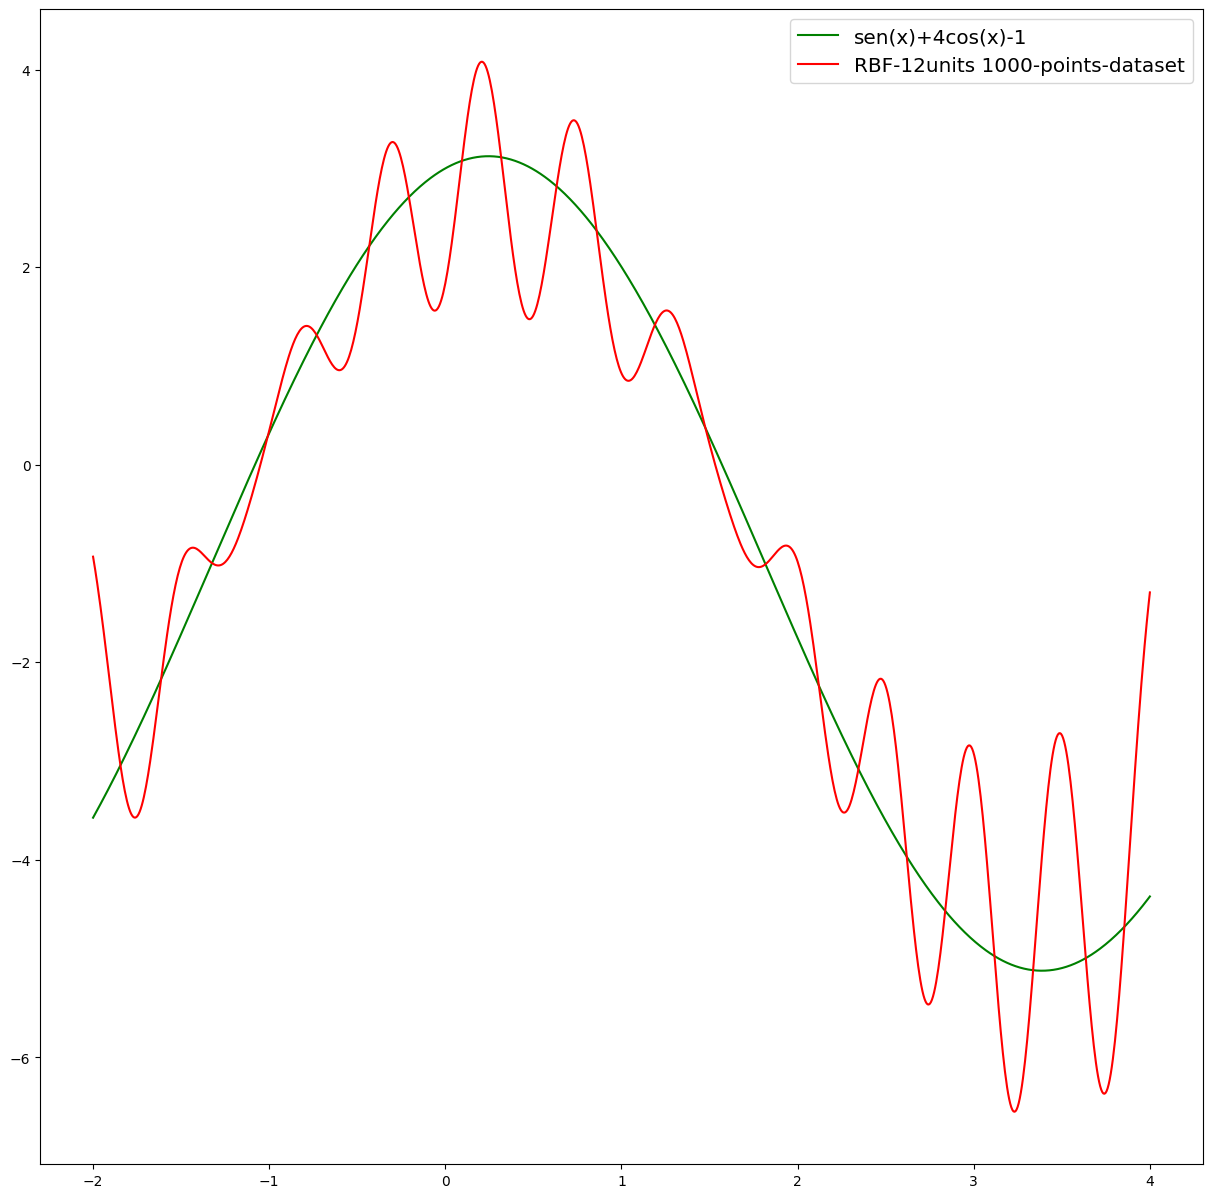

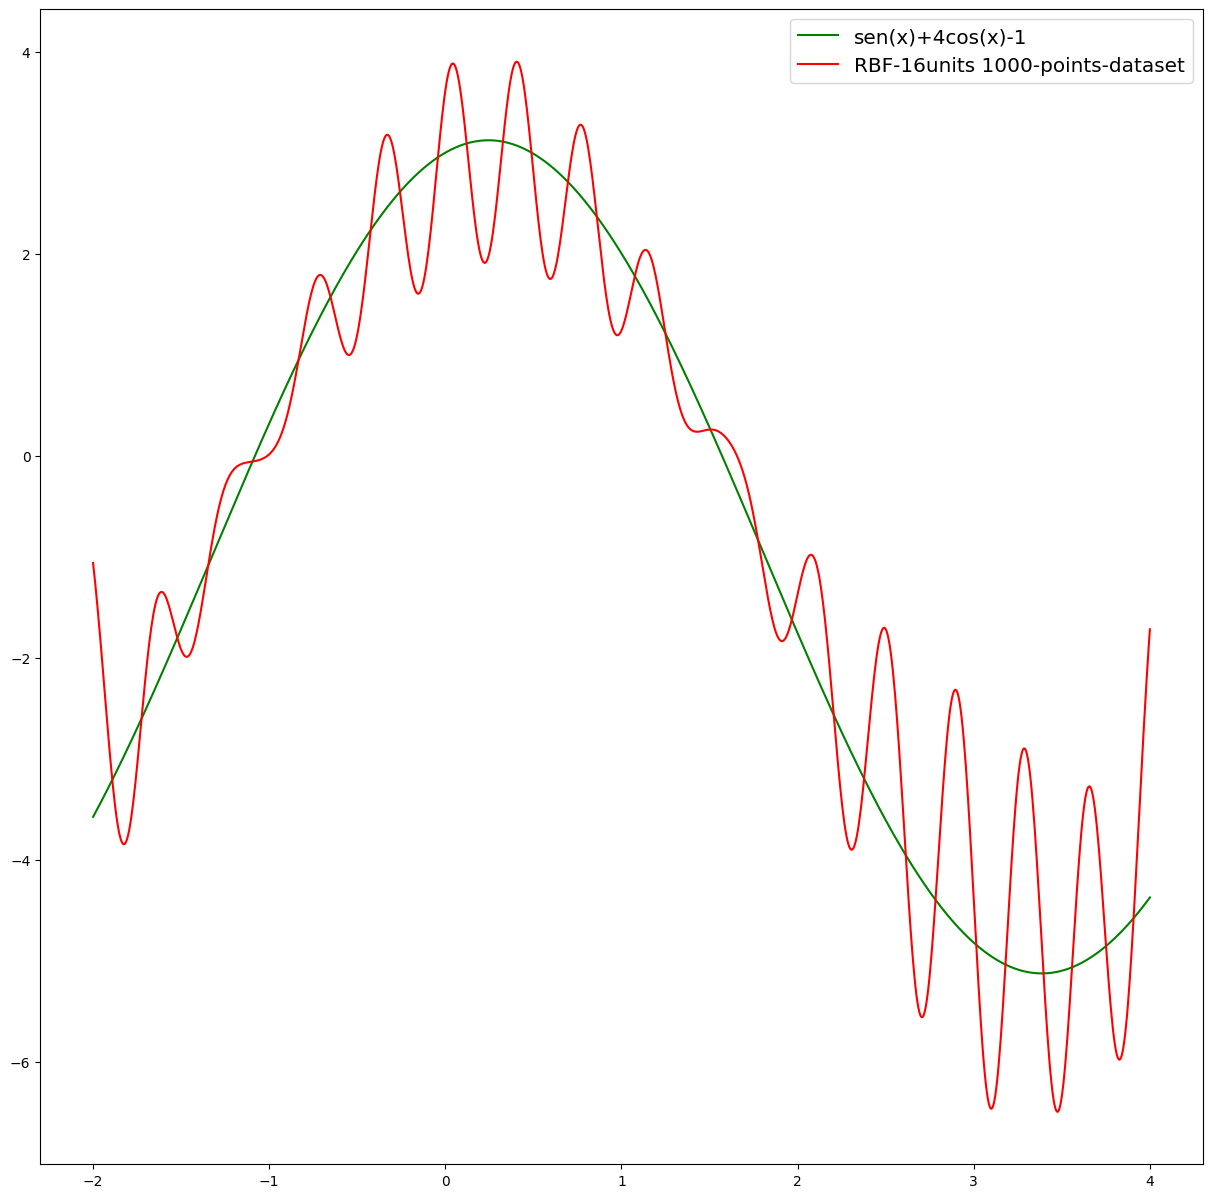

In [11]:
import imageio
import os

params = [(4, 21), (8, 21), (12, 21), (16, 21),
  (4, 100), (8, 100), (12, 100), (16, 100),
  (4, 500), (8, 500), (12, 500), (16, 500),
  (4, 1000), (8, 1000), (12, 1000), (16, 1000)]

fx, fy = generate_data(proposed_function, 1000)

image_dir = os.getcwd()
frames = []

for idx, (n_unit, n_x) in enumerate(params):
  input_dataset, target_dataset = generate_data(proposed_function, n_x)

  rbf_neural_network = RadialBasisFunctionNeuralNetwork(num_of_rbf_units=n_unit)
  rbf_neural_network.train_model(input_dataset, target_dataset)

  predictions = rbf_neural_network.predict(input_dataset)

  fig, ax = plt.subplots(figsize=(15, 15))

  ax.plot(fx, fy, color="green")
  ax.plot(input_dataset, predictions, color="red")

  plt.legend(["sen(x)+4cos(x)-1", f"RBF-{n_unit}units {n_x}-points-dataset"], fontsize="x-large")
  plt.savefig(f"temp_{idx}")
  image = imageio.imread(os.path.join(image_dir, f"temp_{idx}.png"))
  frames.append(image)

imageio.mimsave('animation.gif', frames, fps=0.25)